In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape,y_train.shape ,"***************" ,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [4]:
y_train[0]

9

In [5]:
class_labels = ["T-shirt/top", "Trouser", "Pullover" ,"Dress", "Coat", "Sandal","Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

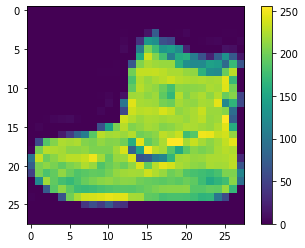

In [7]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

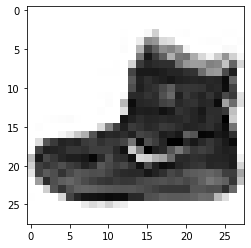

In [8]:
plt.imshow(x_train[0],cmap="Greys")

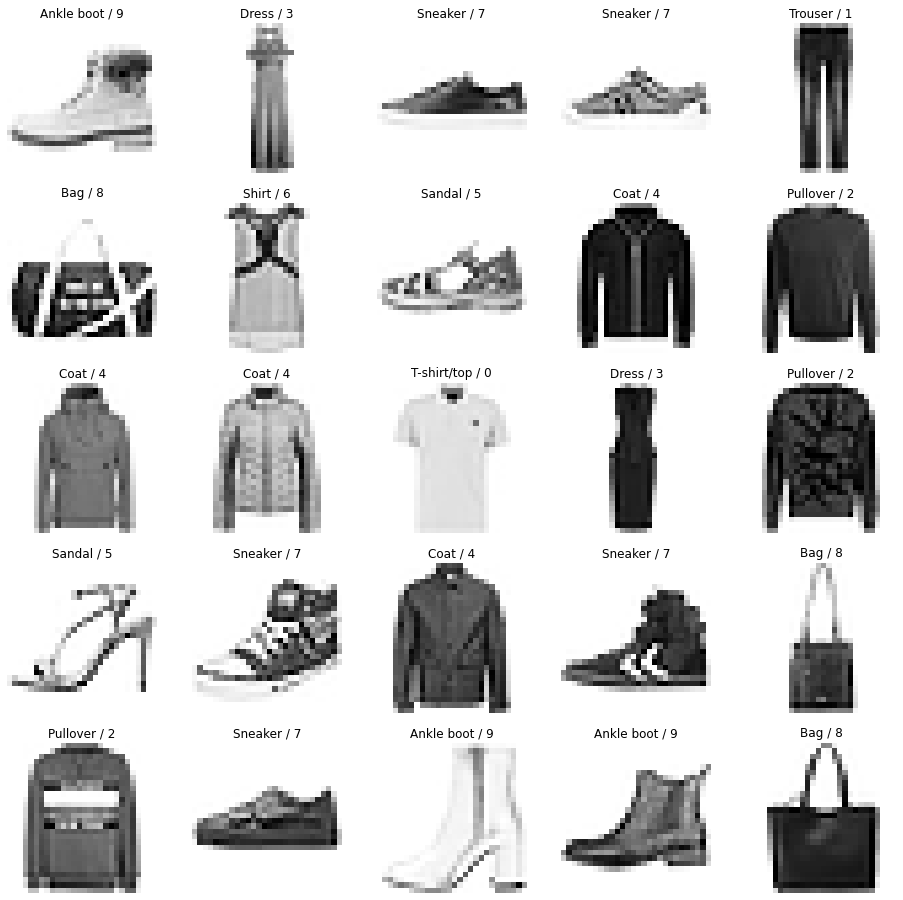

In [9]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_train[i],cmap="Greys")
  plt.axis("off")
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [10]:
x_train.ndim

3

In [11]:
x_train = np.expand_dims(x_train, -1)

In [12]:
x_train.ndim

4

In [13]:
x_test = np.expand_dims(x_test,-1)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [15]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [20]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding="valid",activation="relu",input_shape=[28,28,1]),
                                 keras.layers.MaxPooling2D(pool_size=(2,2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=128,activation="relu"),
                                 keras.layers.Dense(units=10,activation="softmax")
])

In [21]:
model.compile(optimizer="adam",loss="sparse_catergorical_crossentropy",metrics=["accuracy"])

In [28]:
model.fit(x_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(x_validation,y_validation))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


94/94 [==============================] - 18s 187ms/step - loss: 9.3791 - accuracy: 0.6976 - val_loss: 0.5619 - val_accuracy: 0.8198
Epoch 2/10
94/94 [==============================] - 18s 193ms/step - loss: 0.4536 - accuracy: 0.8496 - val_loss: 0.4344 - val_accuracy: 0.8548
Epoch 3/10
94/94 [==============================] - 26s 281ms/step - loss: 0.3562 - accuracy: 0.8772 - val_loss: 0.3860 - val_accuracy: 0.8691
Epoch 4/10
94/94 [==============================] - 23s 249ms/step - loss: 0.3044 - accuracy: 0.8927 - val_loss: 0.3558 - val_accuracy: 0.8807
Epoch 5/10
94/94 [==============================] - 28s 300ms/step - loss: 0.2720 - accuracy: 0.9031 - val_loss: 0.3393 - val_accuracy: 0.8832
Epoch 6/10
94/94 [==============================] - 27s 286ms/step - loss: 0.2440 - accuracy: 0.9139 - val_loss: 0.3350 - val_accuracy: 0.8874
Epoch 7/10
94/94 [==============================] - 21s 226ms/step - loss: 0.2241 - accuracy: 0.9193 - val_loss: 0.3401 - val_accuracy: 0.8842
Epoch 8/10

In [26]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [29]:
y_pred = model.predict(x_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.05, 0.  , 0.  ]], dtype=float32)

In [30]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [31]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3438 - accuracy: 0.8896


[0.3437509834766388, 0.8895999789237976]

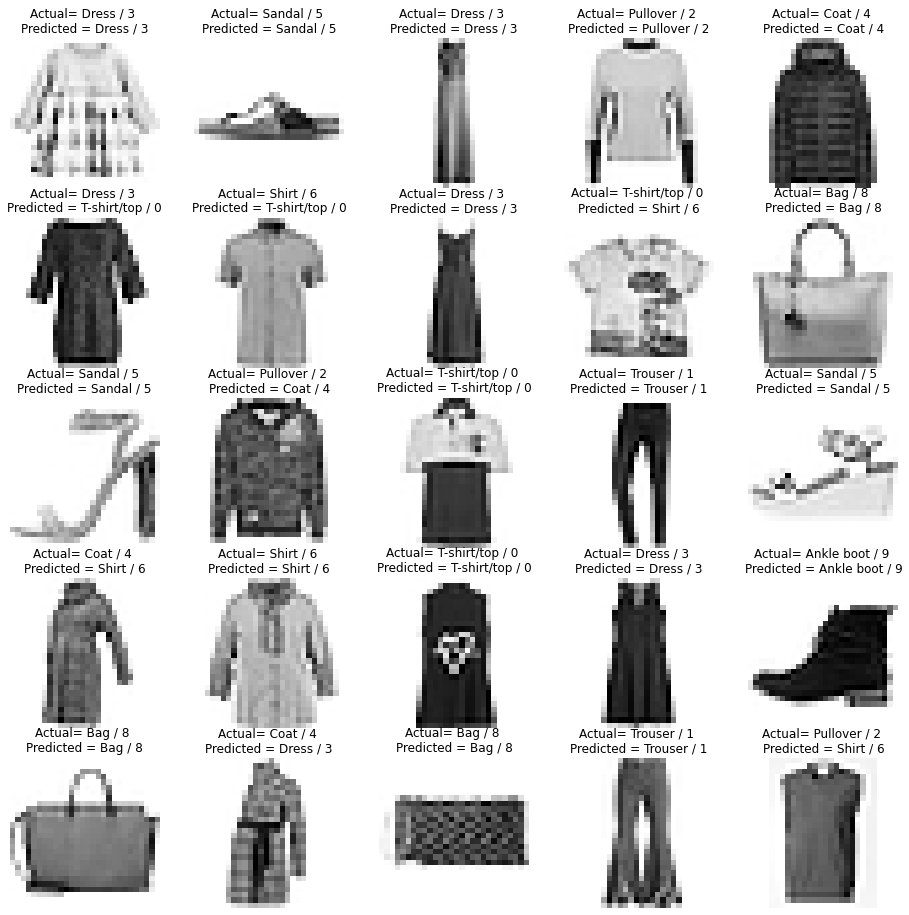

In [36]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap="Greys")
  plt.title("Actual= {} / {} \nPredicted = {} / {}".format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis("off")

In [37]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels =[np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.87      0.83      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.87      0.77      0.82      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.81      0.84      0.83      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.70      0.68      0.69      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



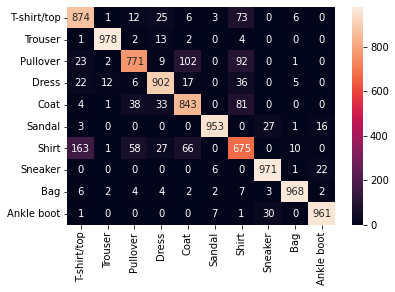

In [38]:
sns.heatmap(cm, annot=True , fmt="d",xticklabels=class_labels,yticklabels=class_labels)
from sklearn.metrics import classification_report
cr= classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

In [39]:
model.save("fashion_mnist_cnn_model.h5")


In [48]:
cnn_model2 = keras.models.Sequential([
                                      keras.layers.Convolution2D(filters=32,kernel_size=3,strides=(1,1),padding="valid",activation="relu",input_shape=[28,28,1]),
                                      keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      keras.layers.Convolution2D(filters=64, kernel_size=3, strides=(2,2), padding="same",activation="relu"),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(units=128,activation="relu"),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=256,activation="relu"),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units=128,activation="relu"),
                                      keras.layers.Dense(units=10,activation="softmax")
])
cnn_model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])
cnn_model2.fit(x_train, y_train, epochs=20, batch_size=512, verbose=1 , validation_data=(x_validation,y_validation))
cnn_model2.save("fashion_mnist_cnn_models3.h5")
cnn_model2.evaluate(x_test,y_test)

Epoch 1/20
94/94 [==============================] - 27s 269ms/step - loss: 1.5057 - accuracy: 0.6578 - val_loss: 0.4511 - val_accuracy: 0.8358
Epoch 2/20
94/94 [==============================] - 23s 249ms/step - loss: 0.4687 - accuracy: 0.8360 - val_loss: 0.3632 - val_accuracy: 0.8699
Epoch 3/20
94/94 [==============================] - 24s 250ms/step - loss: 0.3867 - accuracy: 0.8630 - val_loss: 0.3377 - val_accuracy: 0.8783
Epoch 4/20
94/94 [==============================] - 23s 250ms/step - loss: 0.3407 - accuracy: 0.8782 - val_loss: 0.3039 - val_accuracy: 0.8917
Epoch 5/20
94/94 [==============================] - 24s 251ms/step - loss: 0.3089 - accuracy: 0.8900 - val_loss: 0.2962 - val_accuracy: 0.8939
Epoch 6/20
94/94 [==============================] - 24s 251ms/step - loss: 0.2856 - accuracy: 0.8969 - val_loss: 0.2812 - val_accuracy: 0.9015
Epoch 7/20
94/94 [==============================] - 24s 250ms/step - loss: 0.2639 - accuracy: 0.9039 - val_loss: 0.2780 - val_accuracy: 0.9038

[0.30800873041152954, 0.9060999751091003]